In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 16)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Methods
1. Data cleaning. 
We will load the raw data set into R and cleaning it. By doing so, we will remove any unnecessary columns, check for missing values, and ensure that the data types are correctly assigned.

2. Visualize Data. 
Next, we will explore the data to learn more about the relationship between the variables. We will create visualizations such as scatterplots to identify any trends or potential outliers in the data.

3. Select Variables. 
After exploring the data, we will select two variables for prediction. In this project, we will use roundness and area as they are the most relevant variables for predicting the type of bean.

4. Model the Data. 
Then, we will create a khnn classification model using the variables roundness and area as predictors. I will first split the data into a training set and testing set, and perform cross-validation model for different values of k. After, we will chose the best k that gives the highest accuracy. 

5. Visualization.
Finally, we will create a scatterplot of the data points with different colors representing the different types of beans. By doing so, we can visualize how well the model separates the different types of beans based on the two predictors. We will also create a confusion matrix to show the number of correct and incorrect predictions made by the model for each type of bean.


In [3]:
beanurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
temp <- tempfile()
download.file(beanurl,temp)
beanzip <- unzip(temp, "DryBeanDataset/Dry_Bean_Dataset.xlsx")
bean <- read_excel(beanzip)
bean

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
30477,670.033,211.0502,184.0391,1.146768,0.4894779,30970,196.9886,0.7624015,0.9840814,0.8530799,0.9333736,0.006924899,0.003242016,0.8711862,0.9990487,SEKER
30519,629.727,212.9968,182.7372,1.165591,0.5137596,30847,197.1243,0.7706818,0.9893669,0.9671092,0.9254804,0.006979152,0.003158285,0.8565140,0.9983446,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [4]:
class_dist <- bean |>
                group_by(Class)|>
                summarize(n = n()) |>
                mutate(percentage_dist = 100*n/nrow(bean))
class_dist

Class,n,percentage_dist
<chr>,<int>,<dbl>
BARBUNYA,1322,9.712732
BOMBAY,522,3.835133
CALI,1630,11.975608
DERMASON,3546,26.052458
HOROZ,1928,14.165014
SEKER,2027,14.892366
SIRA,2636,19.366689


In [5]:
##Creating training and testing dataset
set.seed(2022)
bean_split <- initial_split(bean, prop = 0.75, strata = Class)
bean_train <- training(bean_split)
bean_test <- testing(bean_split)

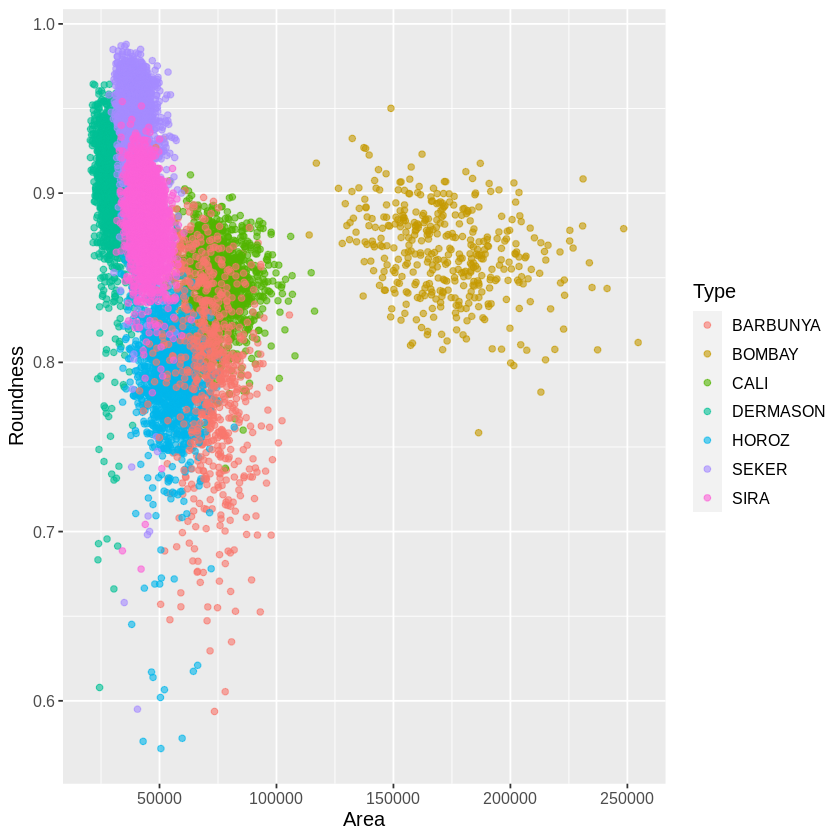

In [6]:
#Graphing the training dataset
area_ecc <- bean_train |>
  ggplot(aes(x = Area, y = roundness, color = Class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Area", 
       y = "Roundness",
       color = "Type") +
  theme(text = element_text(size = 12))
area_ecc

In [7]:
#Summarize training dataset
bean_class_dist <- bean_train |>
                group_by(Class)|>
                summarize(count = n()) |>
                mutate(percentage_dist = 100*count/nrow(bean_train))
bean_class_dist

Class,count,percentage_dist
<chr>,<int>,<dbl>
BARBUNYA,996,9.758009
BOMBAY,404,3.958068
CALI,1226,12.011365
DERMASON,2656,26.021358
HOROZ,1431,14.019790
SEKER,1521,14.901538
SIRA,1973,19.329872


In [8]:
features_dist_by_class <- bean_train |>
                group_by(Class)|>
                summarize(max_area = max(Area),
                          min_area = min(Area),
                          max_roundness = max(roundness),
                          min_roundness = min(roundness))
features_dist_by_class

Class,max_area,min_area,max_roundness,min_roundness
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BARBUNYA,105542,41487,0.9319586,0.5937083
BOMBAY,254616,114004,0.9501045,0.7584168
CALI,116272,45504,0.9200291,0.7374636
DERMASON,42147,20420,0.9666028,0.6078674
HOROZ,81929,33263,0.9190136,0.5718009
SEKER,59385,28395,0.9879197,0.5950484
SIRA,63612,31519,0.9541042,0.6778369


In [9]:
#Statistical Distribution in Features of varieties of dry bean
features_dist <- bean_train |>
            pivot_longer(cols= Area:ShapeFactor4,
                         names_to = "Features",
                         values_to = "values") |>
            group_by(Features) |>
            summarize(Mean = mean(values),
                      Min = min(values),
                      Max = max(values),
                     Std_Deviation = sd(values))
features_dist

Features,Mean,Min,Max,Std_Deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Area,5.316321e+04,2.042000e+04,2.546160e+05,2.959663e+04
AspectRation,1.582878e+00,1.036423e+00,2.430306e+00,2.465159e-01
Compactness,7.999492e-01,6.405768e-01,9.816111e-01,6.161852e-02
ConvexArea,5.388229e+04,2.068400e+04,2.632610e+05,3.004866e+04
Eccentricity,7.508417e-01,2.627744e-01,9.114230e-01,9.179368e-02
EquivDiameter,2.532493e+02,1.612438e+02,5.693744e+02,5.962082e+01
Extent,7.502093e-01,5.666693e-01,8.661946e-01,4.908532e-02
MajorAxisLength,3.203253e+02,1.836012e+02,7.388602e+02,8.608262e+01
MinorAxisLength,2.024413e+02,1.225127e+02,4.601985e+02,4.538716e+01
